## Missing Values

In [ ]:
#### Các kiểu dữ liệu trống

1. ##### Dữ liệu trống hoàn toàn ngẫu nhiên:
Xác suất dữ liệu bị trống là như nhau đối với mọi quan sát
Không có mối quan hệ nào giữa dữ liệu trống và các dữ liệu khác


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# cac hanh khach ko co du lieu ve dia diem len tau
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. ##### Dữ liệu trống một cách không ngẫu nhiên: 
- Dữ liệu bị trống một cách có hệ thống
- Có mối quan hệ giữa dữ liệu trống và các dữ liệu khác

In [13]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

## Tim phan tram hanh khach ko co du lieu ve cho ngoi 
df['cabin_null'].mean()

0.7710437710437711

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [18]:
# Tim phan tram hanh khach ko co du lieu ve cho ngoi phan theo tinh trang song/chet
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### Các kỹ thuật xử lý dữ liệu trống

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation


#### Thay thế bằng Mean/Median/Mode
- Kỹ thuật này giả định rằng dữ liệu trống hoàn toàn ngẫu nhiên
- Thay thế dữ liệu trống bằng Mean/Median/Mode của cột

In [19]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
## Phan tram du lieu trong cua moi cot
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [63]:
# dien du lieu trong cua cot Age
median=df['Age'].mean()
print(median)
df['Age_median']=df['Age'].fillna(median)
df.head()

28.0


,Survived,Age,Fare,Age_median,Age_filled_median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [53]:
# in ra do lech chuan truoc va sau khi dien du lieu trong
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


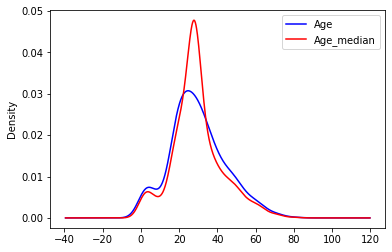

In [62]:
# ve ham mat do xac suat cua cot Age truoc va sau khi dien du lieu trong
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', color='blue')
df['Age_median'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Ưu điểm và Nhược điểm của PP thay thế bằng Mean/Median/Mode:

#### Ưu điểm:
- Dễ thực hiện (ít bị ảnh hưởng bởi giá trị ngoại lệ)
- Nhanh chóng nhận được dataset hoàn chỉnh

#### Nhược điểm:
Làm thay đổi phương sai ban đầu
